Let's first manipulate the data of prevalence and incidence results of 100 simulations of the SIR model not modificated, with input parameters:

$\mu =1/3$, $R_0 = 1.5$ and number of starting point infected=10 in borough 1 (Bronx).


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
f_prevalence={}
nrun = 100

x=0
for i in range(nrun):
    
    path='/home/claudia/Scrivania/Tesi NYC pandemic /Modello/OUTputMOBILE1/outputPREVALENCE'
    extens='.txt'
    complete_path = path + str(x) + extens
    input_file1 = pd.read_csv(complete_path, sep=" ", names=['time step', 'Manhattan'+str(x), 'Bronx'+str(x), 'Brooklyn'+str(x), 'Queens'+str(x),'Staten_Island'+str(x), 'Out'+str(x)])
    input_file1.drop(['Out'+str(x)], axis='columns', inplace=True)
    f_prevalence[x] = pd.DataFrame(input_file1, columns=['time step', 'Manhattan'+str(x), 'Bronx'+str(x), 'Brooklyn'+str(x), 'Queens'+str(x),'Staten_Island'+str(x)]) 
    x+=1;

#f_prevalence

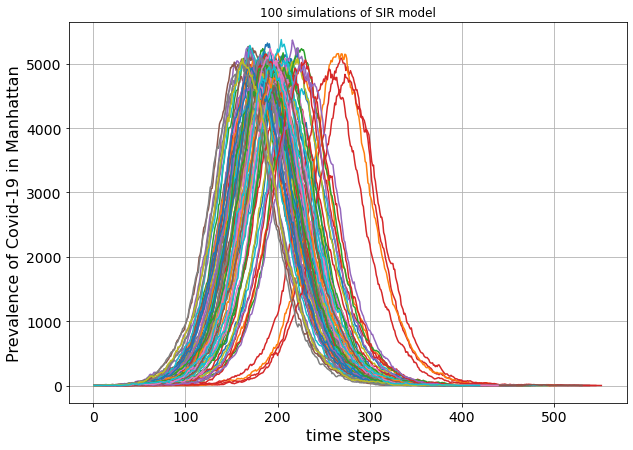

In [3]:
plt.figure(figsize=(10,7))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('time steps', fontsize=16)
plt.ylabel('Prevalence of Covid-19 in Manhattan', fontsize=16)
plt.title('100 simulations of SIR model')

for i in range(nrun):
    plt.plot(f_prevalence[i]['time step'], f_prevalence[i]['Manhattan'+str(i)])
    
plt.grid()

In [4]:
#average values of infected in Manhattan for 100 simulations
full_average=[np.average(np.array(f_prevalence[i]['Manhattan'+str(i)])) for i in range(nrun)]

#average value of infected in Manhattan for a single simulation
avg = np.average(np.array(f_prevalence[0]['Manhattan'+str(0)]))

#I want the time average (at each step I have to average the number of infected in that borough)



Now I want to look at the whole set of simulations and have an idea of the average values of prevalence and incidence for each borough (node in my network) and at each time step of the simulation.
In order to do this, we should first put a treshold of minimunm number of time step that each simulation should count, i.e. that we will discard the shortest simulations present in the whole set.

The fact that we will have short simulations (i.e. of a small number of time steps) is a consequence of the stochasticity of the process. So I will discard the most shortest in number of steps in the simulation (15 simulations) and since the average time steps value is around 435 steps, I will impose a minimum of 412 steps (at 95% of 435) in order to overcome the problem of lack of data.

In the following box we export the data and then use excel to create the dataframe to do the average per timestep of prevalence for each boro.

In [5]:
start_data = {'time step' : f_prevalence[0]['time step'], 'Manhattan'+str(0): f_prevalence[0]['Manhattan'+str(0)]}
data_complete=pd.DataFrame(start_data)

for j in range(nrun-1):
    
        data1={'time step' : f_prevalence[j+1]['time step'], 'Manhattan'+str(j+1): f_prevalence[j+1]['Manhattan'+str(j+1)]}
        data2 = pd.DataFrame(data1)
        data_complete = pd.merge(data_complete, data2, how='outer', left_index=True, right_index=True)

#drop rows of the dataframe that have nan values i.e. not all simulations have same number of steps
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Manhattan prevalence data over 100 simulations
data_complete.to_csv('/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Manhattan_out_prevalence.csv', index=False)

In [6]:
start_data2 = {'time step' : f_prevalence[0]['time step'], 'Bronx'+str(0): f_prevalence[0]['Bronx'+str(0)]}
data_complete2=pd.DataFrame(start_data2)

for j in range(nrun-1):
    
        data1_2={'time step' : f_prevalence[j+1]['time step'], 'Bronx'+str(j+1): f_prevalence[j+1]['Bronx'+str(j+1)]}
        data2_2= pd.DataFrame(data1_2)
        data_complete2 = pd.merge(data_complete2, data2_2, how='outer', left_index=True, right_index=True)

#drop rows of the dataframe that have nan values i.e. not all simulations have same number of steps
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Bronx prevalence data over 100 simulations
data_complete2.to_csv('/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Bronx_out_prevalence.csv', index=False)

In [7]:
start_data3 = {'time step' : f_prevalence[0]['time step'], 'Brooklyn'+str(0): f_prevalence[0]['Brooklyn'+str(0)]}
data_complete3=pd.DataFrame(start_data3)

for j in range(nrun-1):
    
        data1_3={'time step' : f_prevalence[j+1]['time step'], 'Brooklyn'+str(j+1): f_prevalence[j+1]['Brooklyn'+str(j+1)]}
        data2_3= pd.DataFrame(data1_3)
        data_complete3 = pd.merge(data_complete3, data2_3, how='outer', left_index=True, right_index=True)

#drop rows of the dataframe that have nan values i.e. not all simulations have same number of steps
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Brooklyn prevalence data over 100 simulations
data_complete3.to_csv('/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Brooklyn_out_prevalence.csv', index=False)

In [8]:
start_data4 = {'time step' : f_prevalence[0]['time step'], 'Queens'+str(0): f_prevalence[0]['Queens'+str(0)]}
data_complete4=pd.DataFrame(start_data4)

for j in range(nrun-1):
    
        data1_4={'time step' : f_prevalence[j+1]['time step'], 'Queens'+str(j+1): f_prevalence[j+1]['Queens'+str(j+1)]}
        data2_4= pd.DataFrame(data1_4)
        data_complete4 = pd.merge(data_complete4, data2_4, how='outer', left_index=True, right_index=True)

#drop rows of the dataframe that have nan values i.e. not all simulations have same number of steps
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Queens prevalence data over 100 simulations
data_complete4.to_csv('/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Queens_out_prevalence.csv', index=False)

In [9]:
start_data5 = {'time step' : f_prevalence[0]['time step'], 'Staten_Island'+str(0): f_prevalence[0]['Staten_Island'+str(0)]}
data_complete5=pd.DataFrame(start_data5)

for j in range(nrun-1):
    
        data1_5={'time step' : f_prevalence[j+1]['time step'], 'Staten_Island'+str(j+1): f_prevalence[j+1]['Staten_Island'+str(j+1)]}
        data2_5= pd.DataFrame(data1_5)
        data_complete5 = pd.merge(data_complete5, data2_5, how='outer', left_index=True, right_index=True)

#drop rows of the dataframe that have nan values i.e. not all simulations have same number of steps
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Staten_Island prevalence data over 100 simulations
data_complete5.to_csv('/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Staten_Island_out_prevalence.csv', index=False)

In [24]:
#given the dataframe for manhattan prevalence, do average by row per each time step 
#number of involved simulations is 85/100
manhattan_prevalence = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Manhattan_out_prevalence_modified_435.xlsx")
bronx_prevalence = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Bronx_out_prevalence_modified_435.xlsx")
brooklyn_prevalence = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Brooklyn_out_prevalence_modified_435.xlsx")
queens_prevalence = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Queens_out_prevalence_modified_435.xlsx")
staten_island_prevalence = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello/Staten_Island_out_prevalence_modified_435.xlsx")

m = len(manhattan_prevalence)

manhattan_prevalence.drop(['time step'], axis='columns', inplace=True)
full_average_man=[np.average(np.array(manhattan_prevalence.loc[i])) for i in range(m)]
full_array_man=[np.array(manhattan_prevalence.loc[t]) for t in range(m)]

bronx_prevalence.drop(['time step'], axis='columns', inplace=True)
full_average_brn=[np.average(np.array(bronx_prevalence.loc[i])) for i in range(m)]
full_array_brn=[np.array(bronx_prevalence.loc[t]) for t in range(m)]

brooklyn_prevalence.drop(['time step'], axis='columns', inplace=True)
full_average_brook=[np.average(np.array(brooklyn_prevalence.loc[i])) for i in range(m)]
full_array_brook=[np.array(brooklyn_prevalence.loc[t]) for t in range(m)]

queens_prevalence.drop(['time step'], axis='columns', inplace=True)
full_average_quen=[np.average(np.array(queens_prevalence.loc[i])) for i in range(m)]
full_array_quen=[np.array(queens_prevalence.loc[t]) for t in range(m)]

staten_island_prevalence.drop(['time step'], axis='columns', inplace=True)
full_average_stat=[np.average(np.array(staten_island_prevalence.loc[i])) for i in range(m)]
full_array_stat=[np.array(staten_island_prevalence.loc[t]) for t in range(m)]

(50.0, 200.0)

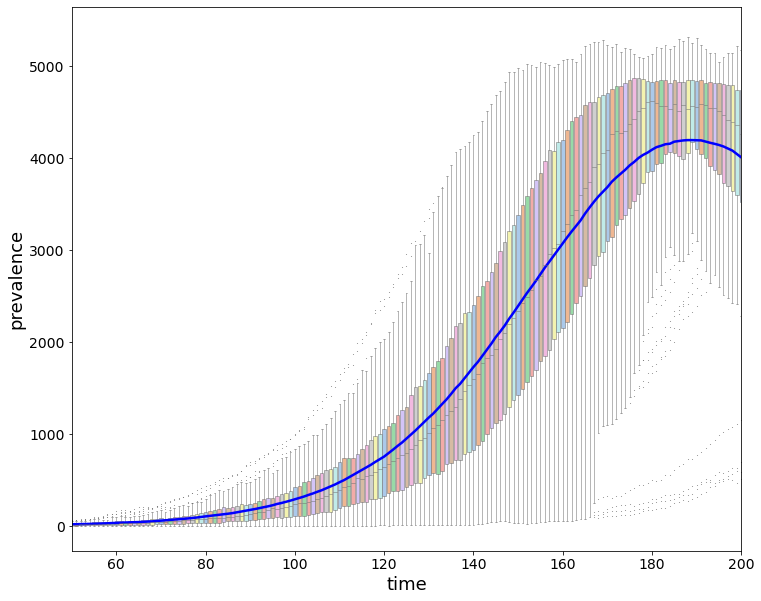

In [67]:
#focus aroud some steps of simulations of epidemic's spreading in Manhattan

plt.figure(figsize=(12,10))

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax=sns.boxplot(data=full_array_man, palette='pastel', linewidth=0.5, fliersize=0.2)
plt.plot(range(0,len(full_average_man)),full_average_man,color='b', linewidth=2.5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())


plt.xlim([50,200])
#plt.show()


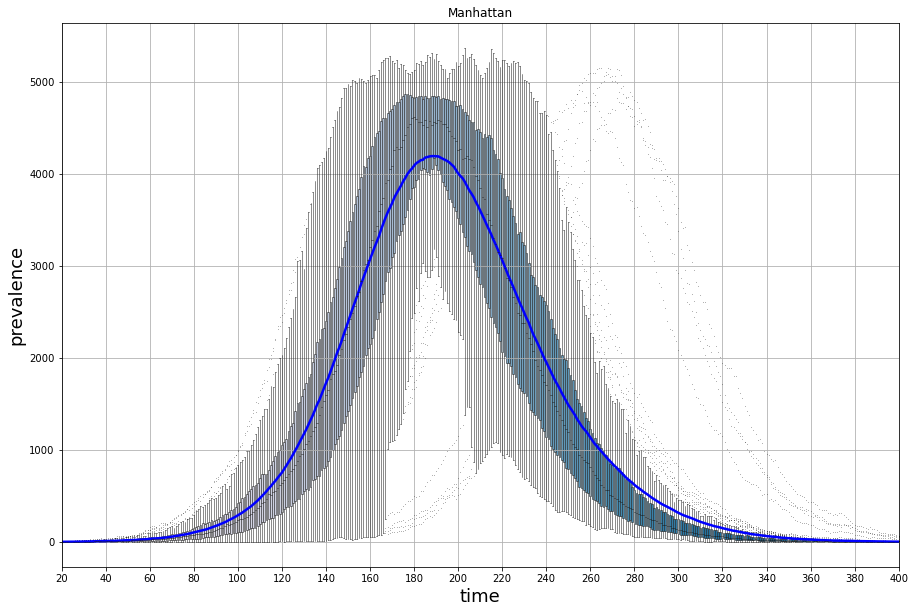

In [91]:
plt.figure(figsize=(15,10))

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)
plt.title('Manhattan')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax=sns.boxplot(data=full_array_man, palette='PuBu', linewidth=0.5, fliersize=0.1)
plt.plot(range(0,len(full_average_man)),full_average_man,color='b', linewidth=2.5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim([20,400])
plt.grid()

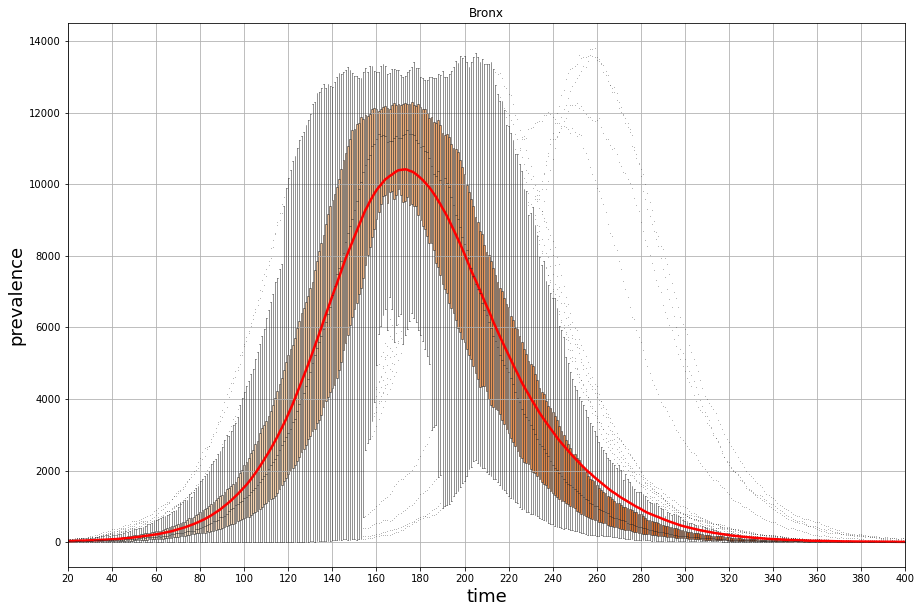

In [90]:
plt.figure(figsize=(15,10))

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)
plt.title('Bronx')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax=sns.boxplot(data=full_array_brn, palette='Oranges', linewidth=0.5, fliersize=0.1)
plt.plot(range(0,len(full_average_brn)),full_average_brn,color='r', linewidth=2.5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim([20,400])
plt.grid()

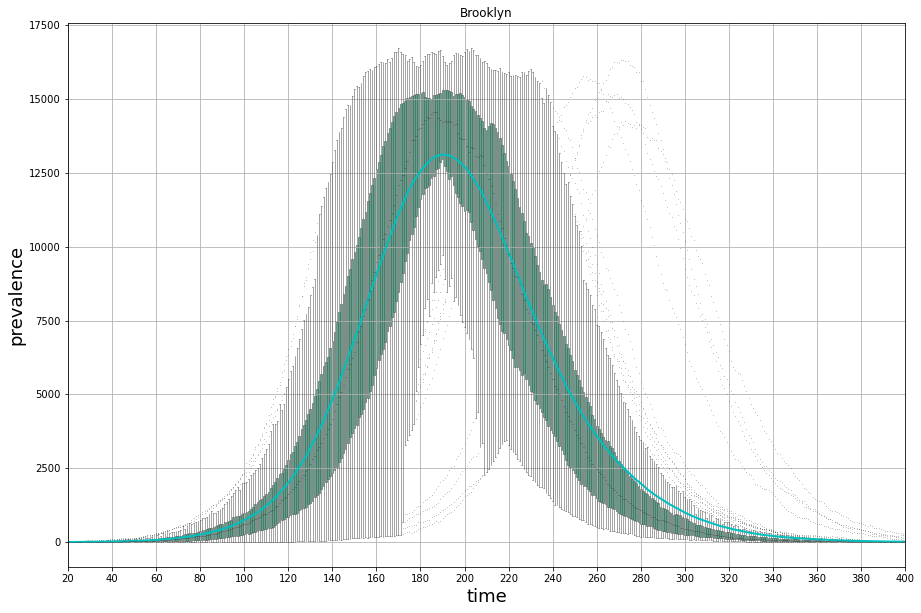

In [92]:
plt.figure(figsize=(15,10))

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)
plt.title('Brooklyn')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax=sns.boxplot(data=full_array_brook, color='#4CB391', linewidth=0.5, fliersize=0.1)
plt.plot(range(0,len(full_average_brook)),full_average_brook,color='c', linewidth=2.0)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim([20,400])
plt.grid()

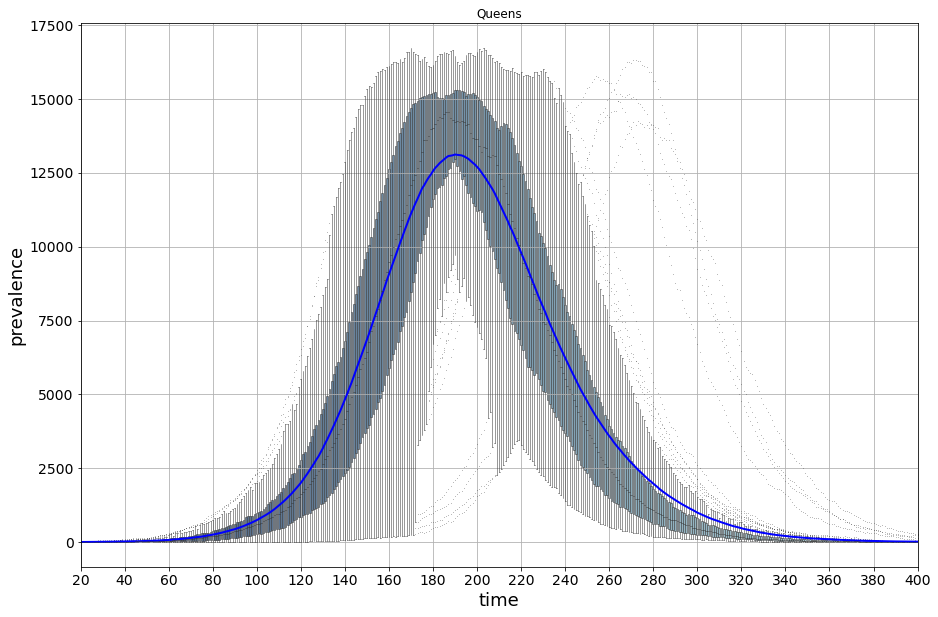

In [93]:
plt.figure(figsize=(15,10))

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)
plt.title('Queens')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax=sns.boxplot(data=full_array_brook, palette="ch:r=-.2,d=.3_r", linewidth=0.5, fliersize=0.1)
plt.plot(range(0,len(full_average_brook)),full_average_brook,color='b', linewidth=2.0)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim([20,400])
plt.grid()

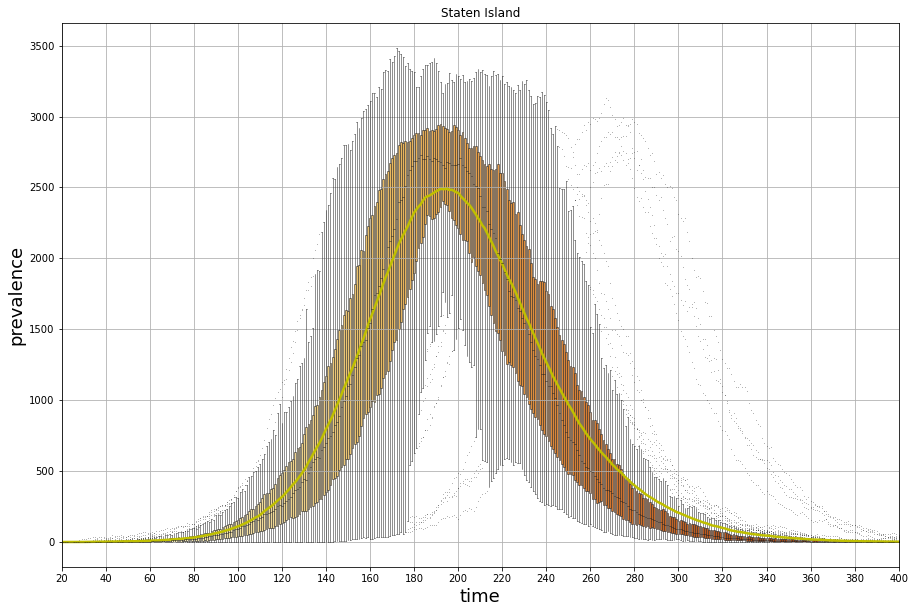

In [94]:
plt.figure(figsize=(15,10))

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)
plt.title('Staten Island')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax=sns.boxplot(data=full_array_stat, palette="YlOrBr", linewidth=0.5, fliersize=0.1)
plt.plot(range(0,len(full_average_stat)),full_average_stat,color='y', linewidth=2.5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlim([20,400])
plt.grid()